# 3b Triggers

One of the reasons why I was excited about these new background estimation methods was because of the possibility to make better use of the triggers that we had in Run 2. So Rafael told me that a good "motivation plot" would just be to try to see how we actually improved our signal acceptance with these extra triggers.


In [19]:
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
from matplotlib import gridspec

import os
os.sys.path.append('../code')
from AnalysisUtils import nanoToDf

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Setup:**
- mc16d SM, MAR20 MNTs
- Trying out exta 2017 triggers from Lucas's first trigger optimization update
- Normalizing to 2017 luminosity


**3b**
`HLT_3j15_gsc35_bmv2c1070_split_j15_gsc35_boffperf_split_L14J15.0ETA25`

This is the *same* L1 trigger, but now with a *looser* $b$-tagging WP.

`HLT_3j50_gsc65_bmv2c1077_split_L13J35.0ETA23`

This is a different L1 trigger with higher $p_T$ thresholds, but there's no cut on a $4^{th}$ jet, so this could pick up very asymmetric events?

I feel skeptical about this one though, because I'm guessing the higher

**4b**
`HLT_4j15_gsc35_bmv2c1077_split_L14J15.0ETA25`

Again same L1 trigger, but now **four** $b$-tags WP.

*This one seems super promising for 4b!*

`HLT_2j15_gsc35_bmv2c1070_split_2j15_gsc35_bmv2c1085_split_L14J15.0ETA25`

*This one seems promising for 3b + 1 loose!*


In [2]:
fDir = "../../hh4b/hh4b-resolved-reconstruction"

In [3]:
lumi17 = 43.65

**Let's start by just looking at the cutflows**

In [7]:
col_4tag = ['Initial','Selected','Ntuple','Trigger','4 good jets $\geq$ 2 tagged',
            '4 tagged', '$\Delta R_{jj}$', '$p_T(h)s$','$\Delta \eta_{hh}$',
            'Muon LepTop','Electron LepTop','HadTop',#'Multijet Enriched',
            '$X_{wt}$','Signal Region','Validation Region','Control Region']

cutflow_4b = pd.DataFrame(None,col_4tag)

for col in ['','_3b','_3+4b']:

    rr = uproot.open(f"{fDir}/sm_mc16d{col}.root")

    cutflow_4b[col] = rr['FourTagCutflow;1'].values*lumi17


In [9]:
cutflow_4b.round(2)

_3b       _3+4b
Initial                      1459842.68  1459842.68  1459842.68
Selected                     1459842.68  1459842.68  1459842.68
Ntuple                           341.06      341.06      341.06
Trigger                          171.34      187.74      187.74
4 good jets $\geq$ 2 tagged      140.42      154.54      154.54
4 tagged                          31.26       33.54       33.54
$\Delta R_{jj}$                   27.67       29.63       29.63
$p_T(h)s$                         26.07       27.89       27.89
$\Delta \eta_{hh}$                23.82       25.41       25.41
Muon LepTop                        0.00        0.00        0.00
Electron LepTop                    0.01        0.01        0.01
HadTop                             1.07        1.20        1.20
$X_{wt}$                          20.14       21.28       21.28
Signal Region                     10.64       11.18       11.18
Validation Region                  5.54        5.87        5.87
Control Region                     2.55        2.73        2.73

In [10]:
.256/.243

1.0534979423868314

This is a **5%** gain in signal acceptance - *not huge!*

In [11]:
3.540352/3.216892

1.1005504692106542

Potentially up to 10% gains with other categories though?

**Next: $m_{hh}$ in the 4b SR**

In [12]:
sdfs = {}

for col in ['','_3b','_3+4b']:

    sdfs[col] = nanoToDf(f"{fDir}/sm_mc16d{col}.root",ttree="sig")
    

sig
sig
sig


In [17]:
edges = np.array([150, 250, 262, 275, 288, 302, 317, 332, 348, 365, 383, 402, 422, 443, 465, 488, 512, 
                  537, 563, 591, 620, 651, 683, 717, 752, 789, 828, 869, 912, 957,1004, 1054, 1106, 1161, 
                  1219, 1279, 1342, 1409, 1479, 1552, 1629, 1710, 1795, 1884, 1978, 2076])

xi = 0.5*(edges[:-1]+edges[1:])

In [41]:
text = '$\mathbf{ATLAS}$ Internal\n'
text += 'SM NR, MAR20 MNT\n'
text += 'DL1r 77% WP, MDR+min$D_{hh}$'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


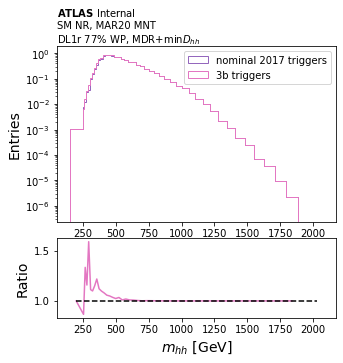

In [43]:
fig = plt.figure(figsize=(5, 5))
gs = gridspec.GridSpec(3,1)
ax1 = fig.add_subplot(gs[:2,0])
ax2 = fig.add_subplot(gs[2:,0],sharex=ax)

ns = []

for col, color,l in zip(['','_3b','_3+4b'],['C4','C6'],#,'C9'],
                        ['nominal 2017 triggers','3b triggers','3b+4b triggers']):
    df = sdfs[col]
    n,_,_ = ax1.hist(df.loc[df.ntag==4,'m_hh'],edges,color=color,log=True,
                     label=l,weights=lumi17*df.loc[df.ntag==4,'mc_sf'],
                     histtype='step')
    ns.append(n)
    
ax2.plot(xi,ns[-1]/ns[0],color='C6') 
ax2.plot(xi,np.ones_like(xi),'k--')
ax1.legend()
ax1.set_ylabel('Entries',fontsize=14)
ax2.set_ylabel('Ratio',fontsize=14)
ax2.set_xlabel('$m_{hh}$ [GeV]',fontsize=14)

plt.text(0,1,text,ha='left',va='bottom',transform=ax1.transAxes)

plt.savefig('figures/triggerMotivation_mhh.pdf',bbox_inches='tight')
plt.show()

In [23]:
len(xi)

45

In [28]:
len(ns[0])

45